<a href="https://colab.research.google.com/github/xian51/sit742/blob/main/XIAN_ZHU_MIS780A2PartA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIS780 Advanced AI For Business - Assignment 2 - T2 2021

## Part A:  Deep Learning for Tabular Data

**Student Name:** Xian Zhu

**Student ID:** 215453182

In [ ]:
%%html
<style>table {float:left}</style>
<style>img {float:left}</style>

## Table of Content
   
1. [Notebook Preparation](#cell_Preparation)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Model Construction](#cell_model)

4. [Model Execution](#cell_execution)
 
5. [Experiments Report](#cell_report)



<a id = "cell_Preparation"></a>
## 1. Notebook Preparation

Codes used to load all required Python libraries.

In [ ]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error

In [ ]:
import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam, RMSprop, Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

Codes used to define any common functions.

In [ ]:
def plot_history(history):
    
    plt.figure(figsize=(12,6)) 
    plt.subplot(1, 2, 1) 
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_absolute_error'])
    plt.plot(history.history['val_mean_absolute_error'])
    plt.title('Model MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

*Load data from file and carry out necessary preprocessing.*

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
smart_home = pd.read_csv("/content/drive/MyDrive/PartA-SmartHomeEnergyConsumption.csv")
smart_home.head(10)

,gen [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,Total Consuption
0,0.003483,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,0.932833
1,0.003467,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,0.934333
2,0.003467,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,0.931817
3,0.003483,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,1.022050
4,0.003467,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,1.139400
5,0.003433,0.000283,0.503250,0.063667,0.447033,0.122300,0.006717,0.012433,0.000483,0.000567,0.000000,0.031450,0.001017,0.004067,0.001583,0.003433,36.14,1.391867
6,0.003450,0.000283,0.499400,0.063717,0.443267,0.122050,0.006733,0.012417,0.000517,0.000550,0.000000,0.031550,0.001033,0.004117,0.001533,0.003450,36.14,1.366217
7,0.003417,0.000250,0.477867,0.178633,0.444283,0.121800,0.006783,0.012550,0.000483,0.000450,0.000000,0.031733,0.001033,0.004200,0.001550,0.003417,36.14,1.431900
8,0.003417,0.000183,0.447650,0.365700,0.441467,0.121617,0.006950,0.012717,0.000467,0.000300,0.000017,0.031767,0.001017,0.004200,0.001567,0.003417,36.14,1.627300
9,0.003417,0.000017,0.171550,0.682500,0.438733,0.121633,0.007233,0.013350,0.000367,0.000050,0.000000,0.031667,0.001017,0.004200,0.001617,0.003417,36.14,1.735383


In [ ]:
print('Number of records read: ', smart_home.size)

Number of records read:  539964


In [ ]:
smart_home.dtypes

gen [kW]            float64
Dishwasher [kW]     float64
Furnace 1 [kW]      float64
Furnace 2 [kW]      float64
Home office [kW]    float64
Fridge [kW]         float64
Wine cellar [kW]    float64
Garage door [kW]    float64
Kitchen 12 [kW]     float64
Kitchen 14 [kW]     float64
Kitchen 38 [kW]     float64
Barn [kW]           float64
Well [kW]           float64
Microwave [kW]      float64
Living room [kW]    float64
Solar [kW]          float64
temperature         float64
Total Consuption    float64
dtype: object

In [ ]:
#check missing values
missing = smart_home.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending=False)

Series([], dtype: int64)

The output shows that there is no missing values.

Then, look at data distributions with histograms 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


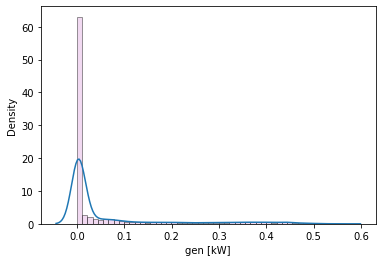

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


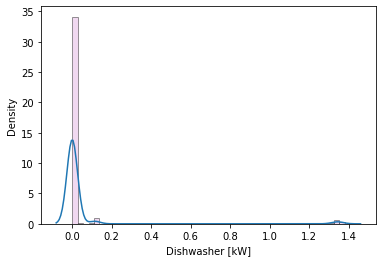

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


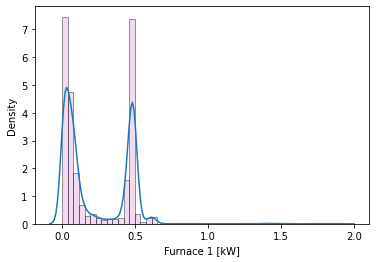

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


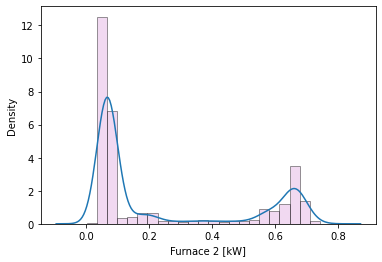

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


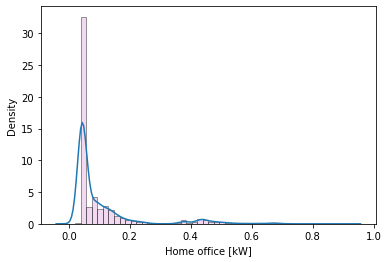

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


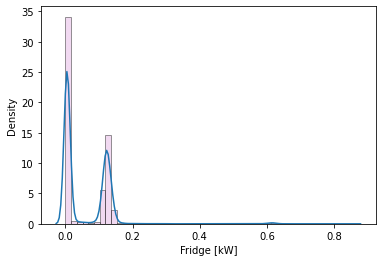

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


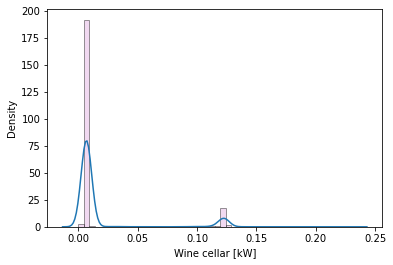

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


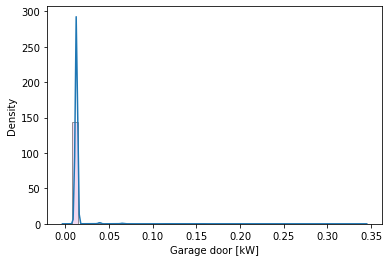

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


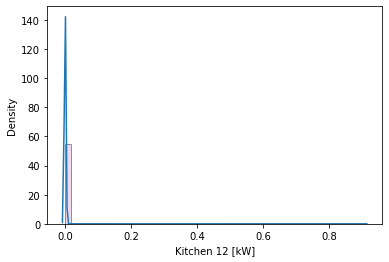

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


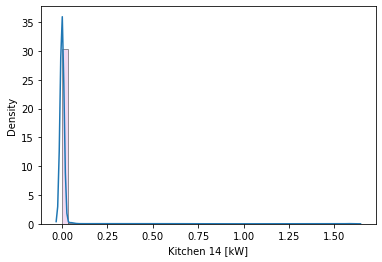

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


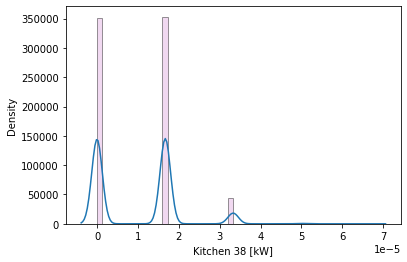

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


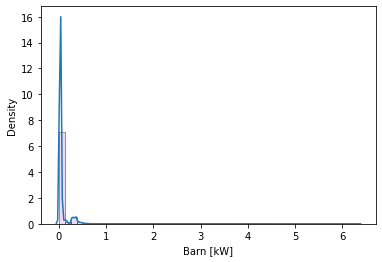

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


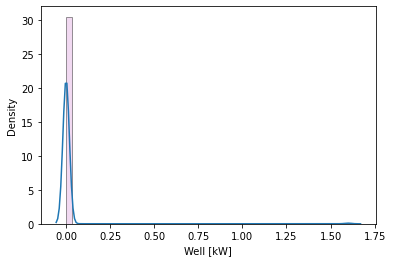

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


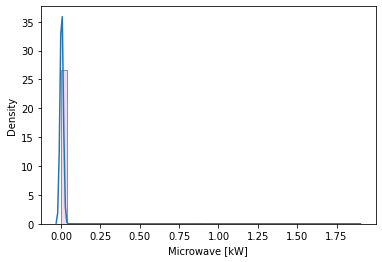

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


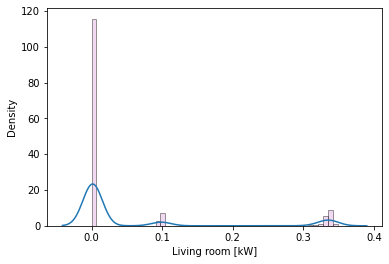

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


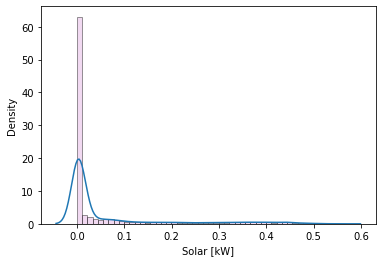

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


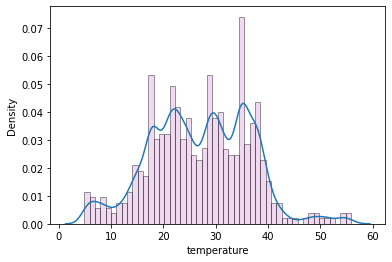

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


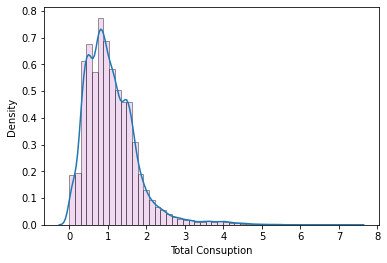

In [ ]:
for column in smart_home:
    sns.distplot(smart_home[column], hist_kws=dict(color='plum',    edgecolor="k", linewidth=1))
    plt.show()

Look at scatter plots of total consumption as target and the variables

In [ ]:
target = smart_home['Total Consuption']
smart_home2 = smart_home.drop(columns=['Total Consuption'])

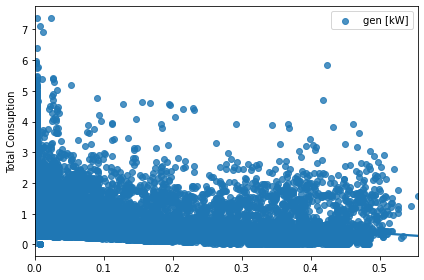

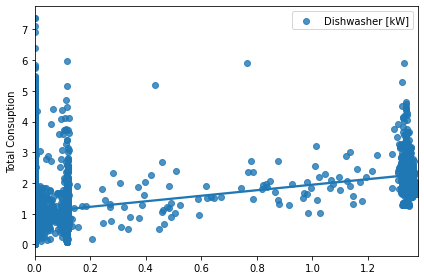

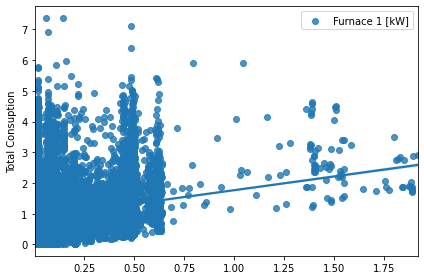

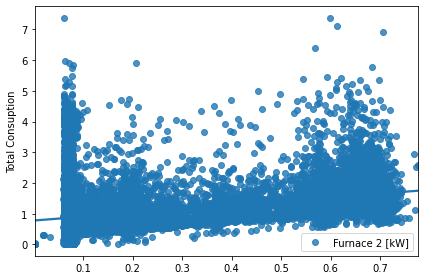

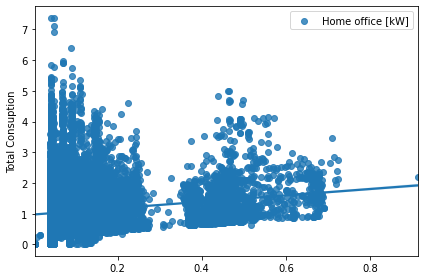

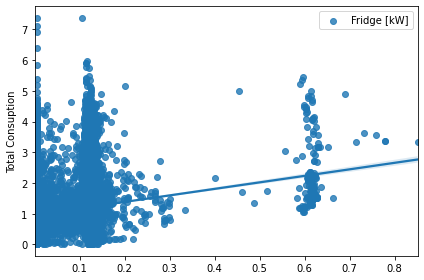

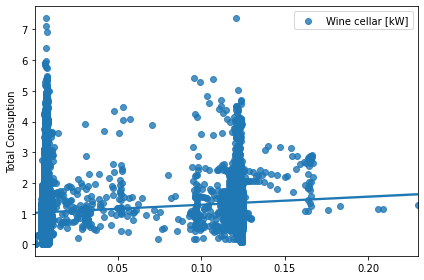

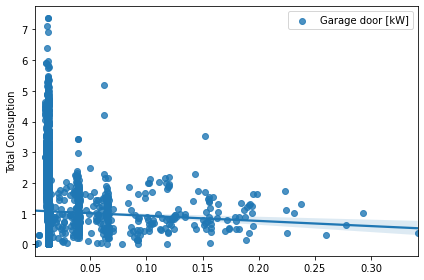

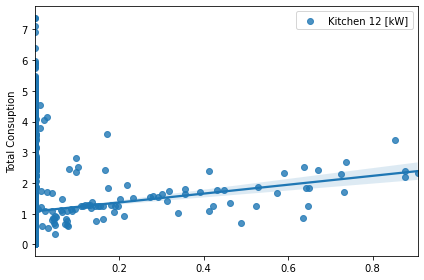

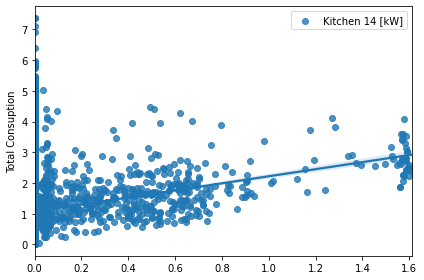

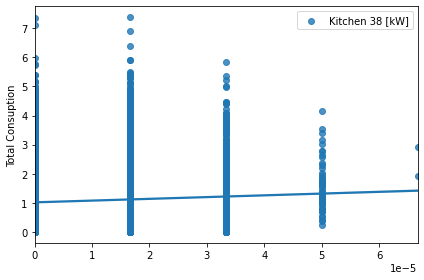

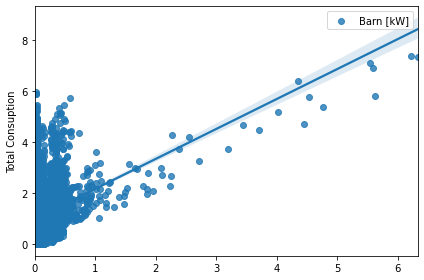

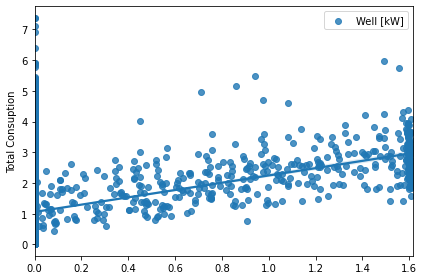

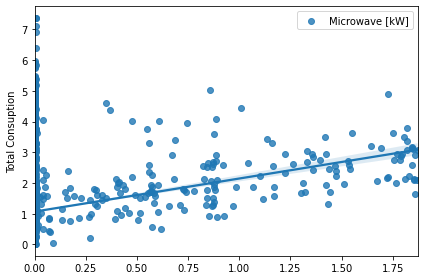

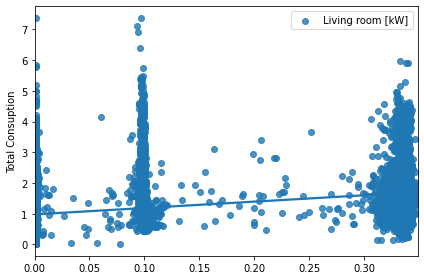

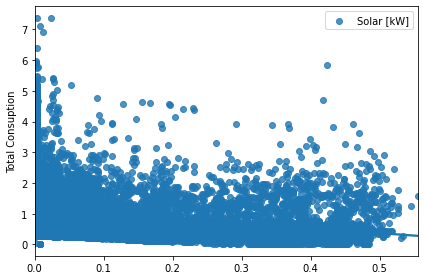

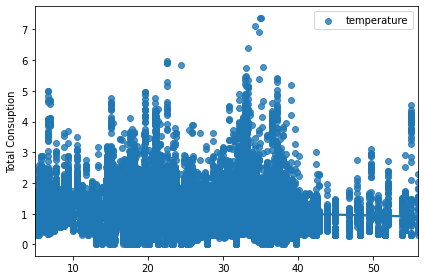

In [ ]:
for col in smart_home2:
    sns.regplot(x=smart_home2[col], y=target, data=smart_home2, label=col)
    plt.ylabel('Total Consuption')
    plt.xlabel('')
    plt.legend()
    plt.tight_layout()
    plt.show()

It is found that kitchen 38 is a category, other variables have a linear relation to total consumption.

Look at heatmap of correlations

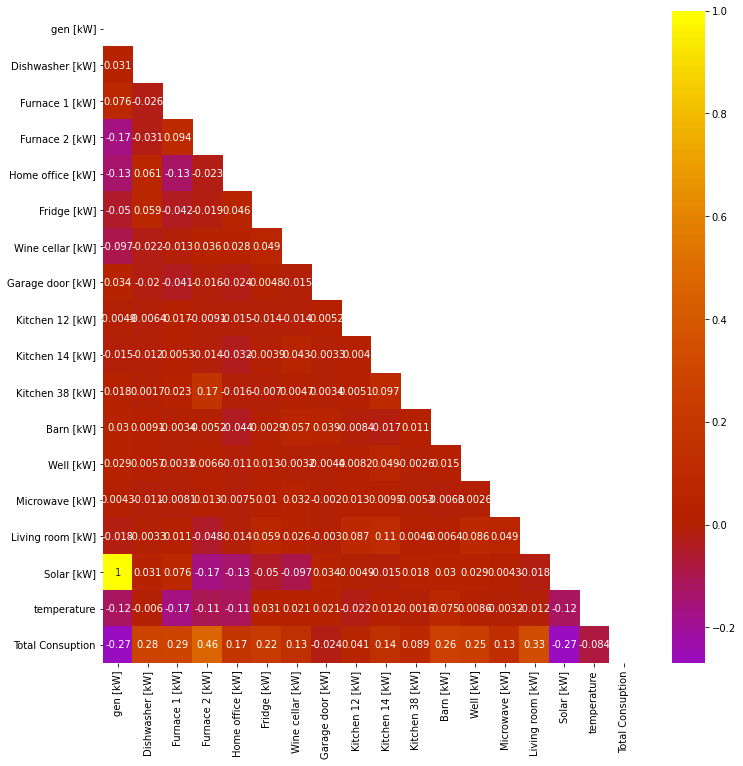

In [ ]:
corr = smart_home.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize= (12,12))
sns.heatmap(corr, annot=True, center=0, mask=mask, cmap='gnuplot')
plt.show()

The results show that a correlation between Solar and gen is 1, and correlation between total consumption and gen or solar are both 0.27, which indicates a situation of multicollinearity. Therefore, gen would be removed. Additionally, the correlation values between garage door and total consumption ,kitchen 12 and total consumption are too small, which indicates the relationship is very weak. Therefore, kitchen 12 and garage door would be removed.

In [ ]:
smart_home = smart_home.drop(columns=['gen [kW]','Kitchen 12 [kW]','Garage door [kW]'])
smart_home.head(5)

,Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,Total Consuption
0,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,0.932833
1,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,0.934333
2,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,0.931817
3,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,1.022050
4,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,1.139400


Split data for training and validation 

In [ ]:
train_size, valid_size, test_size = (0.7, 0.3, 0.0)
energy_train, energy_valid = train_test_split(smart_home, 
                                      test_size=valid_size, 
                                      random_state=2020)

In [ ]:
label_col = 'Total Consuption'
energy_y_train = energy_train[[label_col]]
energy_x_train = energy_train.drop(label_col, axis=1)
energy_y_valid = energy_valid[[label_col]]
energy_x_valid = energy_valid.drop(label_col, axis=1)
print('Size of training set: ', len(energy_x_train))
print('Size of validation set: ', len(energy_x_valid))

Size of training set:  20998
Size of validation set:  9000


Nomalize the dataset 

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(energy_x_train)
energy_x_train = pd.DataFrame(scaler.transform(energy_x_train), 
                            columns = energy_x_train.columns, index = energy_x_train.index)
energy_x_valid = pd.DataFrame(scaler.transform(energy_x_valid), 
                            columns = energy_x_valid.columns, index = energy_x_valid.index)

print('X train min =', round(energy_x_train.min().min(),3), '; max =', round(energy_x_train.max().max(), 3))
print('X valid min =', round(energy_x_valid.min().min(),3), '; max =', round(energy_x_valid.max().max(), 3))

X train min = 0.0 ; max = 1.0
X valid min = 0.0 ; max = 1.092


In [ ]:
energy_x_train.head(5)

,Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature
25867,0.000157,0.249771,0.080786,0.053412,0.005924,0.029858,0.000196,0.250375,0.004915,0.000619,0.002142,0.004684,0.005977,0.331175
8139,0.000012,0.067134,0.101150,0.045214,0.006801,0.030657,0.000021,0.000000,0.004333,0.000619,0.002258,0.004445,0.215725,0.386894
22487,0.000024,0.105545,0.173812,0.097857,0.151763,0.028333,0.000072,0.000000,0.053212,0.000609,0.002348,0.003107,0.053909,0.554051
20804,0.000000,0.034395,0.101064,0.041079,0.006352,0.028623,0.000010,0.250375,0.004338,0.000619,0.002249,0.004349,0.490675,0.613498
28794,0.000048,0.035963,0.877749,0.042305,0.006823,0.031166,0.000176,0.250375,0.004986,0.000619,0.002267,0.004780,0.006067,0.485384


<a id = "cell_model"></a>
## 3. Model Construction

In [ ]:
arr_x_train = np.array(energy_x_train)
arr_y_train = np.array(energy_y_train)
arr_x_valid = np.array(energy_x_valid)
arr_y_valid = np.array(energy_y_valid)

print('Training shape:', arr_x_train.shape)
print('Training samples: ', arr_x_train.shape[0])
print('Validation samples: ', arr_x_valid.shape[0])

Training shape: (20998, 14)
Training samples:  20998
Validation samples:  9000


Model 1: consist of 3 layers,use RMSprop optimizer

In [ ]:
#model 
def basic_model_1(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(80, activation="relu", input_shape=(x_size,)))
    t_model.add(Dense(40, activation="softmax"))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-07, decay=0.0),
        metrics=[metrics.mae])
    return(t_model)

Model 2: consist of 4 layers, first uses 20% dropouts, the second used 10% dropouts. use Adam optimizer

In [ ]:
#model 2
def basic_model_2(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(120, activation="relu"))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(20, activation="elu"))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
        metrics=[metrics.mae])
    return(t_model)

Model 3: consist of 5 layers, the first uses 10% dropouts, the second and third both use 20% dropouts, use Nadam optimizer.

In [ ]:
#Model 3
def basic_model_3(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(180, activation="relu"))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(20, activation="relu"))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(10, activation="elu"))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer=Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
        metrics=[metrics.mae])
    return(t_model)

Model 4: consists of 5 layers, the first and second both use 20% dropouts, the third and forth both use 10% dropouts. use sgd optimizer.

In [ ]:
#Model 4
def basic_model_4(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(80, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(40, activation="relu"))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(180, activation="relu"))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(10, activation="elu"))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
        metrics=[metrics.mae])
    return(t_model)


Model 5: consist of 5 layers, use RMSprop optimizer

In [ ]:
#model 5
def basic_model_5(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(80, activation="tanh", kernel_initializer='random_uniform', bias_initializer='zeros',input_shape=(x_size,)))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(120, activation="softmax", kernel_initializer='normal', 
        kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(20, activation="relu", kernel_initializer='random_uniform', bias_initializer='zeros',
        kernel_regularizer=regularizers.l1_l2(0.01), bias_regularizer=regularizers.l1_l2(0.01)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(10, activation="relu", kernel_initializer='normal'))
    t_model.add(Dropout(0.0))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-07, decay=0.0),
        metrics=[metrics.mae])
    return(t_model)

In [ ]:
model1 = basic_model_1(arr_x_train.shape[1], arr_y_train.shape[1])
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 80)                1200      
_________________________________________________________________
dense_23 (Dense)             (None, 40)                3240      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 41        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model2 = basic_model_2(arr_x_train.shape[1], arr_y_train.shape[1])
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 100)               1500      
_________________________________________________________________
dropout_13 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 120)               12120     
_________________________________________________________________
dropout_14 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 20)                2420      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 21        
Total params: 16,061
Trainable params: 16,061
Non-trainable params: 0
__________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model3 = basic_model_3(arr_x_train.shape[1], arr_y_train.shape[1])
model3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 100)               1500      
_________________________________________________________________
dropout_15 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 180)               18180     
_________________________________________________________________
dropout_16 (Dropout)         (None, 180)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 20)                3620      
_________________________________________________________________
dropout_17 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)               

In [ ]:
model4 = basic_model_4(arr_x_train.shape[1], arr_y_train.shape[1])
model4.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 80)                1200      
_________________________________________________________________
dropout_18 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 40)                3240      
_________________________________________________________________
dropout_19 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 180)               7380      
_________________________________________________________________
dropout_20 (Dropout)         (None, 180)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 10)               

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model5 = basic_model_5(arr_x_train.shape[1], arr_y_train.shape[1])
model5.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 80)                1200      
_________________________________________________________________
dropout_22 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 120)               9720      
_________________________________________________________________
dropout_23 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 20)                2420      
_________________________________________________________________
dropout_24 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)               

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
keras_callbacks = [
    EarlyStopping(monitor='val_mean_absolute_error', patience=20, verbose=0)
]

In [ ]:
history1 = model1.fit(arr_x_train, arr_y_train,
    batch_size=128,
    epochs=500,
    shuffle=True,
    verbose=2,
    validation_data=(arr_x_valid, arr_y_valid),
    callbacks=keras_callbacks)

Epoch 1/500
165/165 - 1s - loss: 0.9373 - mean_absolute_error: 0.7211 - val_loss: 0.6178 - val_mean_absolute_error: 0.5450
Epoch 2/500
165/165 - 1s - loss: 0.4709 - mean_absolute_error: 0.4410 - val_loss: 0.3721 - val_mean_absolute_error: 0.3480
Epoch 3/500
165/165 - 1s - loss: 0.2952 - mean_absolute_error: 0.2995 - val_loss: 0.2532 - val_mean_absolute_error: 0.2727
Epoch 4/500
165/165 - 1s - loss: 0.2183 - mean_absolute_error: 0.2442 - val_loss: 0.2047 - val_mean_absolute_error: 0.2464
Epoch 5/500
165/165 - 1s - loss: 0.1940 - mean_absolute_error: 0.2265 - val_loss: 0.1906 - val_mean_absolute_error: 0.2281
Epoch 6/500
165/165 - 1s - loss: 0.1779 - mean_absolute_error: 0.2143 - val_loss: 0.1619 - val_mean_absolute_error: 0.2045
Epoch 7/500
165/165 - 1s - loss: 0.1541 - mean_absolute_error: 0.1935 - val_loss: 0.1479 - val_mean_absolute_error: 0.1820
Epoch 8/500
165/165 - 1s - loss: 0.1434 - mean_absolute_error: 0.1848 - val_loss: 0.1384 - val_mean_absolute_error: 0.1810
Epoch 9/500
165/

In [ ]:
history2 = model2.fit(arr_x_train, arr_y_train,
    batch_size=128,
    epochs=500,
    shuffle=True,
    verbose=2,
    validation_data=(arr_x_valid, arr_y_valid),
    callbacks=keras_callbacks)

Epoch 1/500
165/165 - 1s - loss: 0.2104 - mean_absolute_error: 0.2692 - val_loss: 0.1325 - val_mean_absolute_error: 0.2003
Epoch 2/500
165/165 - 1s - loss: 0.1417 - mean_absolute_error: 0.2035 - val_loss: 0.1213 - val_mean_absolute_error: 0.1570
Epoch 3/500
165/165 - 1s - loss: 0.1294 - mean_absolute_error: 0.1902 - val_loss: 0.1162 - val_mean_absolute_error: 0.1683
Epoch 4/500
165/165 - 1s - loss: 0.1244 - mean_absolute_error: 0.1816 - val_loss: 0.1129 - val_mean_absolute_error: 0.1500
Epoch 5/500
165/165 - 1s - loss: 0.1212 - mean_absolute_error: 0.1793 - val_loss: 0.1170 - val_mean_absolute_error: 0.1379
Epoch 6/500
165/165 - 1s - loss: 0.1178 - mean_absolute_error: 0.1735 - val_loss: 0.1099 - val_mean_absolute_error: 0.1509
Epoch 7/500
165/165 - 1s - loss: 0.1165 - mean_absolute_error: 0.1726 - val_loss: 0.1094 - val_mean_absolute_error: 0.1480
Epoch 8/500
165/165 - 1s - loss: 0.1153 - mean_absolute_error: 0.1690 - val_loss: 0.1121 - val_mean_absolute_error: 0.1365
Epoch 9/500
165/

In [ ]:
history3 = model3.fit(arr_x_train, arr_y_train,
    batch_size=128,
    epochs=500,
    shuffle=True,
    verbose=2,
    validation_data=(arr_x_valid, arr_y_valid),
    callbacks=keras_callbacks)

Epoch 1/500
165/165 - 2s - loss: 0.2631 - mean_absolute_error: 0.3097 - val_loss: 0.2205 - val_mean_absolute_error: 0.2751
Epoch 2/500
165/165 - 1s - loss: 0.1565 - mean_absolute_error: 0.2255 - val_loss: 0.1222 - val_mean_absolute_error: 0.1533
Epoch 3/500
165/165 - 1s - loss: 0.1405 - mean_absolute_error: 0.2077 - val_loss: 0.1152 - val_mean_absolute_error: 0.1661
Epoch 4/500
165/165 - 1s - loss: 0.1324 - mean_absolute_error: 0.1966 - val_loss: 0.1180 - val_mean_absolute_error: 0.1473
Epoch 5/500
165/165 - 1s - loss: 0.1285 - mean_absolute_error: 0.1902 - val_loss: 0.1147 - val_mean_absolute_error: 0.1574
Epoch 6/500
165/165 - 1s - loss: 0.1249 - mean_absolute_error: 0.1843 - val_loss: 0.1179 - val_mean_absolute_error: 0.1478
Epoch 7/500
165/165 - 1s - loss: 0.1198 - mean_absolute_error: 0.1795 - val_loss: 0.1137 - val_mean_absolute_error: 0.1480
Epoch 8/500
165/165 - 1s - loss: 0.1177 - mean_absolute_error: 0.1764 - val_loss: 0.1146 - val_mean_absolute_error: 0.1478
Epoch 9/500
165/

In [ ]:
history4 = model4.fit(arr_x_train, arr_y_train,
    batch_size=128,
    epochs=500,
    shuffle=True,
    verbose=2,
    validation_data=(arr_x_valid, arr_y_valid),
    callbacks=keras_callbacks)

Epoch 1/500
165/165 - 1s - loss: 0.2829 - mean_absolute_error: 0.3378 - val_loss: 0.1588 - val_mean_absolute_error: 0.2010
Epoch 2/500
165/165 - 1s - loss: 0.1842 - mean_absolute_error: 0.2506 - val_loss: 0.1716 - val_mean_absolute_error: 0.2966
Epoch 3/500
165/165 - 1s - loss: 0.1722 - mean_absolute_error: 0.2410 - val_loss: 0.1399 - val_mean_absolute_error: 0.1721
Epoch 4/500
165/165 - 1s - loss: 0.1593 - mean_absolute_error: 0.2268 - val_loss: 0.1355 - val_mean_absolute_error: 0.1682
Epoch 5/500
165/165 - 1s - loss: 0.1527 - mean_absolute_error: 0.2191 - val_loss: 0.1311 - val_mean_absolute_error: 0.1640
Epoch 6/500
165/165 - 1s - loss: 0.1490 - mean_absolute_error: 0.2167 - val_loss: 0.1507 - val_mean_absolute_error: 0.1952
Epoch 7/500
165/165 - 1s - loss: 0.1448 - mean_absolute_error: 0.2112 - val_loss: 0.1302 - val_mean_absolute_error: 0.1610
Epoch 8/500
165/165 - 1s - loss: 0.1439 - mean_absolute_error: 0.2071 - val_loss: 0.1419 - val_mean_absolute_error: 0.1823
Epoch 9/500
165/

In [ ]:
history5 = model5.fit(arr_x_train, arr_y_train,
    batch_size=128,
    epochs=500,
    shuffle=True,
    verbose=2,
    validation_data=(arr_x_valid, arr_y_valid),
    callbacks=keras_callbacks)

Epoch 1/500
165/165 - 2s - loss: 1.0471 - mean_absolute_error: 0.7273 - val_loss: 0.5201 - val_mean_absolute_error: 0.5035
Epoch 2/500
165/165 - 1s - loss: 0.5071 - mean_absolute_error: 0.5021 - val_loss: 0.5136 - val_mean_absolute_error: 0.5027
Epoch 3/500
165/165 - 1s - loss: 0.5009 - mean_absolute_error: 0.5016 - val_loss: 0.5089 - val_mean_absolute_error: 0.5022
Epoch 4/500
165/165 - 1s - loss: 0.4953 - mean_absolute_error: 0.5014 - val_loss: 0.5020 - val_mean_absolute_error: 0.5072
Epoch 5/500
165/165 - 1s - loss: 0.4908 - mean_absolute_error: 0.5011 - val_loss: 0.5020 - val_mean_absolute_error: 0.5168
Epoch 6/500
165/165 - 1s - loss: 0.4885 - mean_absolute_error: 0.5017 - val_loss: 0.4969 - val_mean_absolute_error: 0.5058
Epoch 7/500
165/165 - 1s - loss: 0.4861 - mean_absolute_error: 0.5013 - val_loss: 0.4978 - val_mean_absolute_error: 0.5026
Epoch 8/500
165/165 - 1s - loss: 0.4841 - mean_absolute_error: 0.5012 - val_loss: 0.4955 - val_mean_absolute_error: 0.5033
Epoch 9/500
165/

<a id = "cell_execution"></a>
## 4. Model Execution

**Model 1**

In [ ]:
train_score = model1.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = model1.evaluate(arr_x_valid, arr_y_valid, verbose=0)

print('Train Mean:', round(energy_y_train['Total Consuption'].mean(), 4))
print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
print('Val Mean:', round(energy_y_valid['Total Consuption'].mean(), 4))
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))

Train Mean: 1.0763
Train MAE:  0.1278 , Train Loss:  0.085
Val Mean: 1.0877
Val MAE:  0.1314 , Val Loss:  0.0936


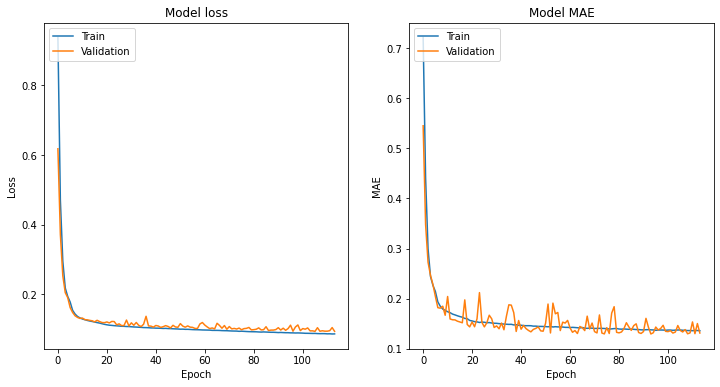

In [ ]:
plot_history(history1)

The results show that the train MAE and Validation MAE value are both low and acceptable. Additionally, the model shows minimal difference between Train and Validation for both model loss and MAE.

**Model 2**

In [ ]:
train_score = model2.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = model2.evaluate(arr_x_valid, arr_y_valid, verbose=0)

print('Train Mean:', round(energy_y_train['Total Consuption'].mean(), 3))
print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 3)) 
print('Val Mean:', round(energy_y_valid['Total Consuption'].mean(), 3))
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 3))

Train Mean: 1.076
Train MAE:  0.1347 , Train Loss:  0.077
Val Mean: 1.088
Val MAE:  0.1388 , Val Loss:  0.088


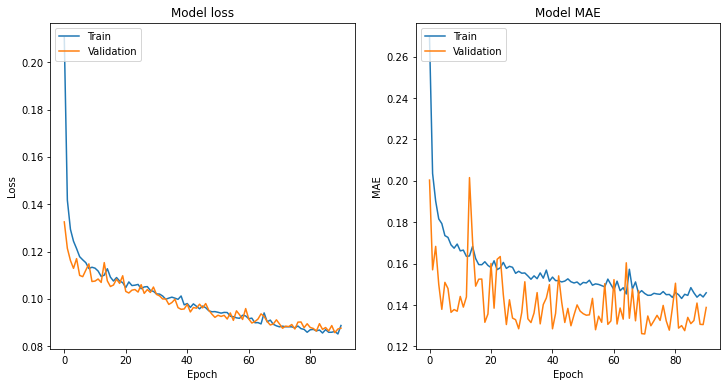

In [ ]:
plot_history(history2)

The results show that the Train MAE and Validation MAE value are both low and acceptable, additionally, the difference between train and validation is minimal in terms of model loss. However, the MAE of Train and Validation shows moderate difference.

**Model 3**

In [ ]:
train_score = model3.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = model3.evaluate(arr_x_valid, arr_y_valid, verbose=0)

print('Train Mean:', round(energy_y_train['Total Consuption'].mean(), 3))
print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 3)) 
print('Val Mean:', round(energy_y_valid['Total Consuption'].mean(), 3))
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 3))

Train Mean: 1.076
Train MAE:  0.1557 , Train Loss:  0.084
Val Mean: 1.088
Val MAE:  0.1608 , Val Loss:  0.095


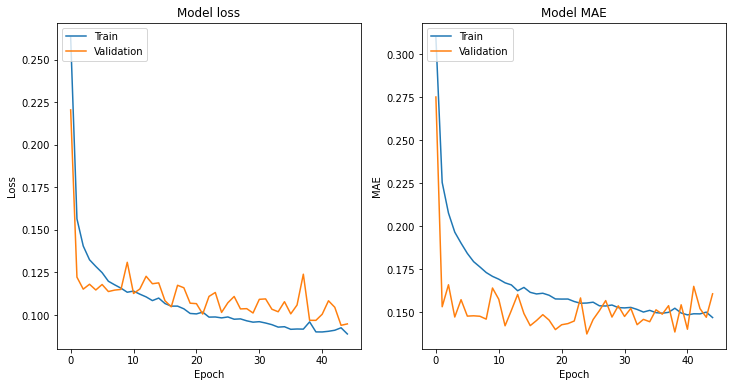

In [ ]:
plot_history(history3)

The results show that the Train MAE and Validation MAE value are both low and acceptable. However, MAE and loss of Train and Vlidation show moderate difference.

**Model 4**

In [ ]:
train_score = model4.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = model4.evaluate(arr_x_valid, arr_y_valid, verbose=0)

print('Train Mean:', round(energy_y_train['Total Consuption'].mean(), 3))
print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 3)) 
print('Val Mean:', round(energy_y_valid['Total Consuption'].mean(), 3))
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 3))

Train Mean: 1.076
Train MAE:  0.1715 , Train Loss:  0.125
Val Mean: 1.088
Val MAE:  0.1749 , Val Loss:  0.131


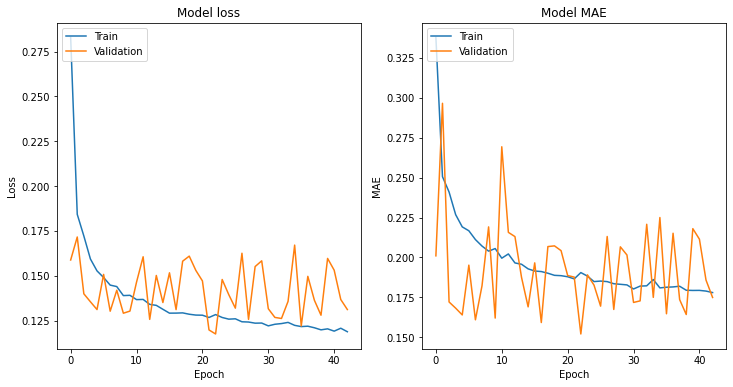

In [ ]:
plot_history(history4)

The results show that the Train MAE and Validation MAE value are both low and acceptable. However, the model shows significant difference between Train and Validation for both model loss and MAE.

**Model 5**

In [ ]:
train_score = model5.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = model5.evaluate(arr_x_valid, arr_y_valid, verbose=0)

print('Train Mean:', round(energy_y_train['Total Consuption'].mean(), 4))
print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
print('Val Mean:', round(energy_y_valid['Total Consuption'].mean(), 4))
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))

Train Mean: 1.0763
Train MAE:  0.5049 , Train Loss:  0.4802
Val Mean: 1.0877
Val MAE:  0.5102 , Val Loss:  0.4904


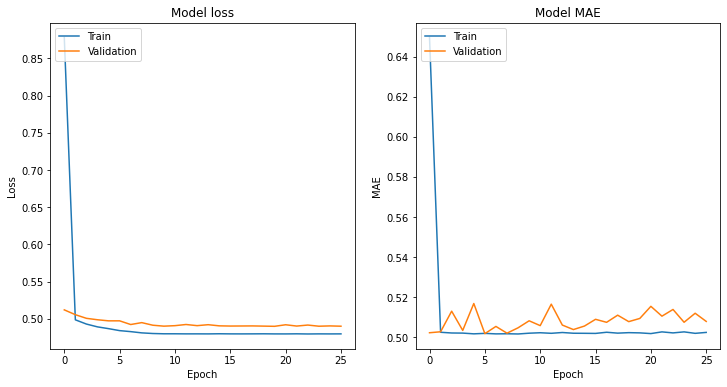

In [ ]:
plot_history(history5)

The results show that the differences between Train and Validation in terms of loss and Mae are both slight. However, the MAE values of Train and Validation are both too high and unacceptable.

<a id = "cell_report"></a>
## 5. Experiments Report




| Model |Train MAE |Valid MAE |
| :-:   | -: |               -: |
| 1 | 0.1465  |0.1573|  |
| 2 | 0.1269  |0.1315              |  |
| 3 | 0.1548  |0.1606 |   |
| 4 | 0.1671  |0.1709 |  |
| 5 | 0.5024  |0.5078 |  |

<br>

Model 1 shows that the train MAE and Validation MAE value are both low and acceptable. Additionally, the model shows minimal difference between Train and Validation for both model loss and MAE.
Model 2 shows that the Train MAE and Validation MAE value are both low and acceptable, additionally, the difference between train and validation is minimal in terms of model loss. However, the MAE of Train and Validation shows moderate difference.
Model 3 shows that the Train MAE and Validation MAE value are both low and acceptable. However, MAE and loss of Train and Vlidation shows moderate difference.
Model 4 shows that the Train MAE and Validation MAE value are both low and acceptable. However, the model shows significant difference between Train and Validation for both model loss and MAE.
Model 5 shows that the differences between Train and Validation in terms of loss and Mae are both slight. However, the MAE values of Train and Validation are both too high and unacceptable. 
Model 1 would be recommeded as the final solution because it has the lowest MAE values for both Train and Vlidation, which means this model can predict results with least error. Additioanlly, it has excellent performance in terms of difference between Train and Validation. On the other hand, although model 5 has excellent performance in terms of differences between Train and Validation, but its MAE values are not acceptable and this is the most important point. Other models all have good performance in terms of MAE values, but their difference between Train and Validation is much larger than model 1. Therefore, model 1 is the best option.